<a href="https://colab.research.google.com/github/Gowthami191/Basic-Landing-page/blob/main/LSTM_Based_Time_series_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Load dataset
data = pd.read_csv("/content/AppleStockPrices.csv")
# Keep only Date & Close
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print(data.head())
print(data.shape)

               Close
Date                
1980-12-12  0.100600
1980-12-15  0.095352
1980-12-16  0.088353
1980-12-17  0.090540
1980-12-18  0.093165
(10274, 1)


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

In [5]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

WINDOW_SIZE = 60

X, y = create_sequences(scaled_data, WINDOW_SIZE)

In [6]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(WINDOW_SIZE, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 1.7479e-05 - val_loss: 1.6663e-05
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 8.8245e-07 - val_loss: 1.2560e-05
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 8.0458e-07 - val_loss: 1.3429e-05
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 6.6255e-07 - val_loss: 1.2887e-05
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 6.0351e-07 - val_loss: 1.9653e-05
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 4.6816e-07 - val_loss: 8.4783e-06
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 3.9467e-07 - val_loss: 1.4376e-05
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 4.4991e-07 - val_loss: 1.0370e-05
Epoch 9/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 4.0603e-07 - val_loss: 2.2354e-05
Epoch 10/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 4.8621e-07 - val_loss: 9.5846e-06
Epoch 11/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 29

In [9]:
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [10]:
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)

print("RMSE:", rmse)
print("MAE :", mae)

RMSE: 2.8347463551162972
MAE : 1.876533788848145


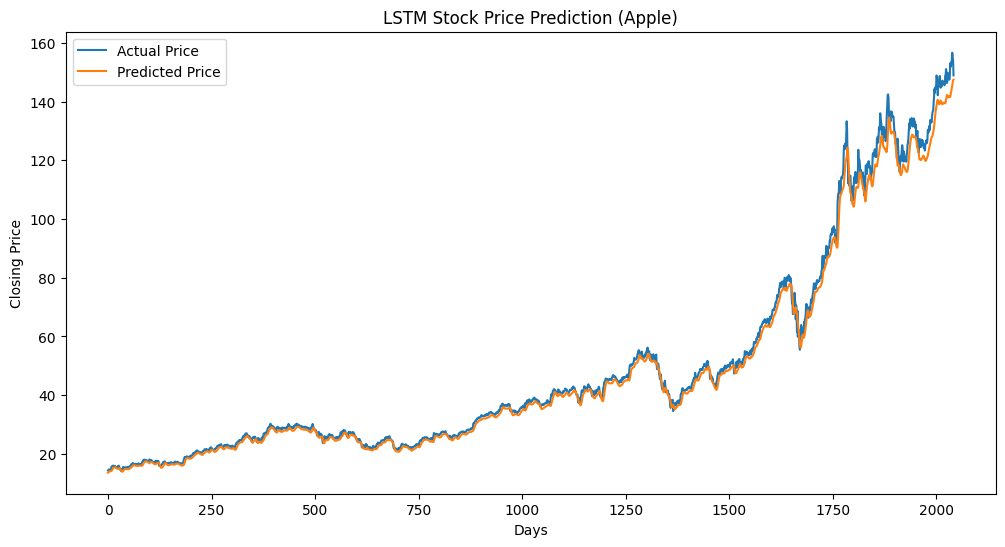

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.title("LSTM Stock Price Prediction (Apple)")
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

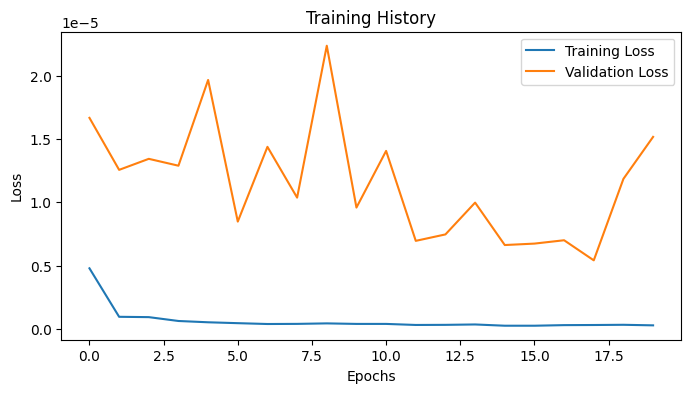

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training History")
plt.legend()
plt.show()